
# Support Vector Machines Project 

**Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.**


## Getting the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")



## Get the data

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
129,130,7.2,3.0,5.8,1.6,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.drop(['Id'],axis =1,inplace = True)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
len(df[df.duplicated()])

3

In [8]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Exploratory Data Analysis


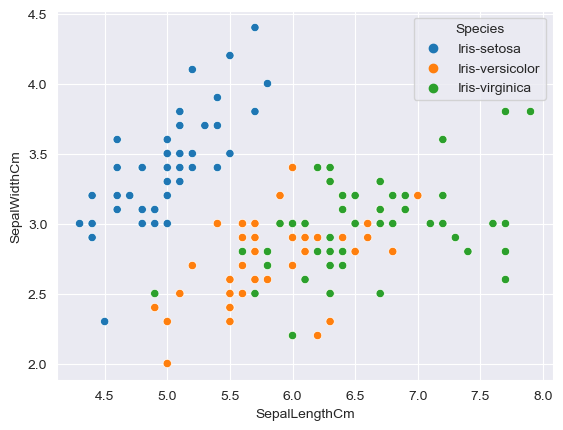

In [9]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",data = df,hue = 'Species')
plt.show()

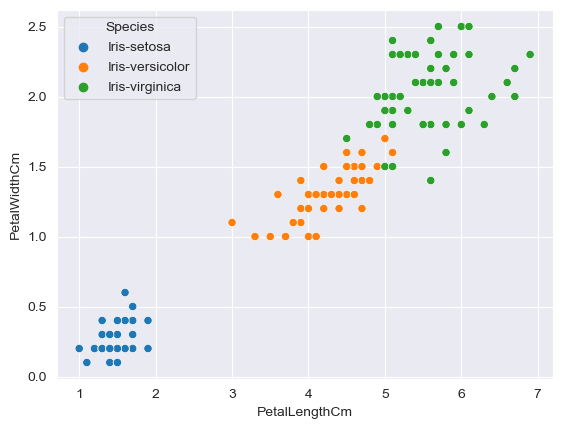

In [10]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm",data = df,hue = 'Species')
plt.show()

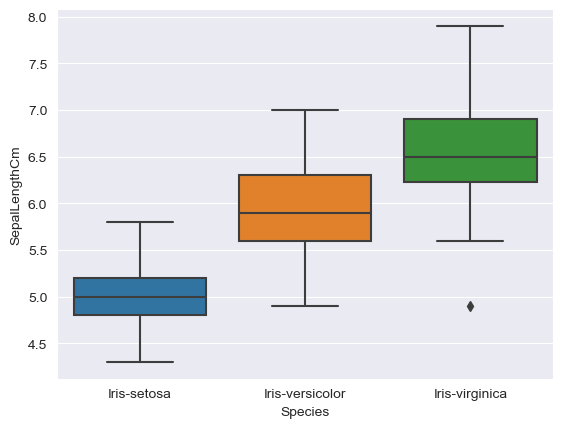

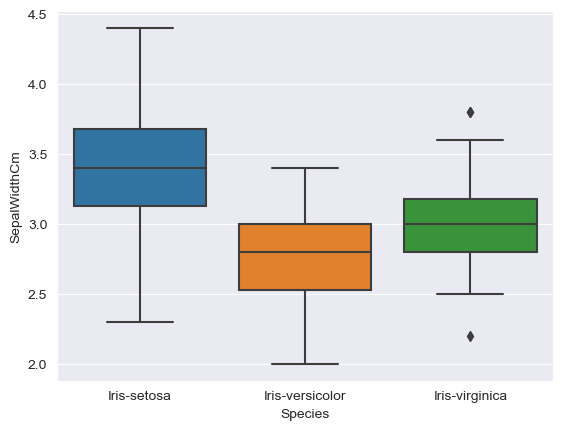

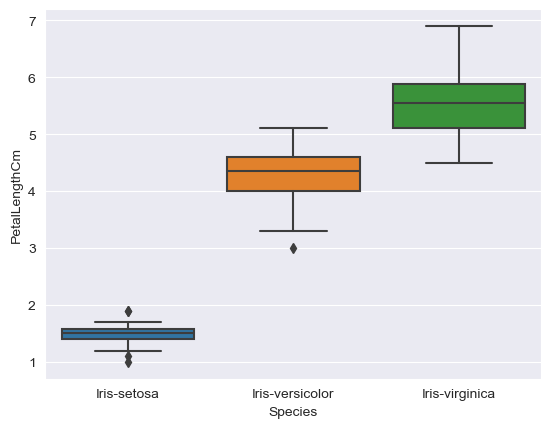

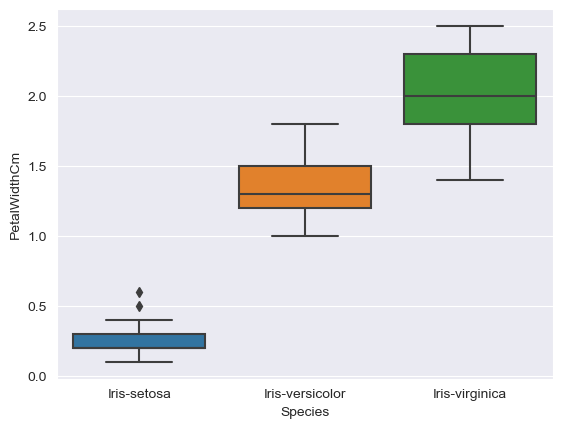

In [11]:
for col in df.columns[ :-1]:
    sns.boxplot(x="Species", y=col, data=df)
    plt.show()

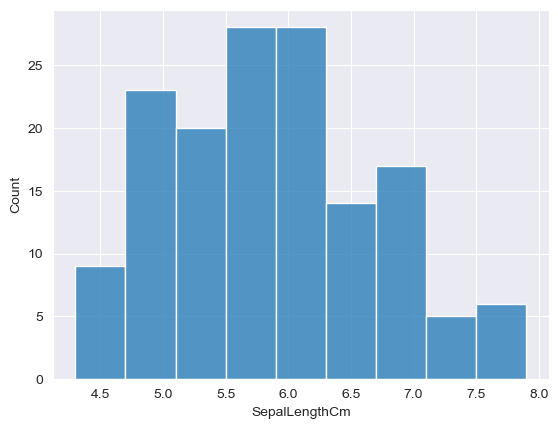

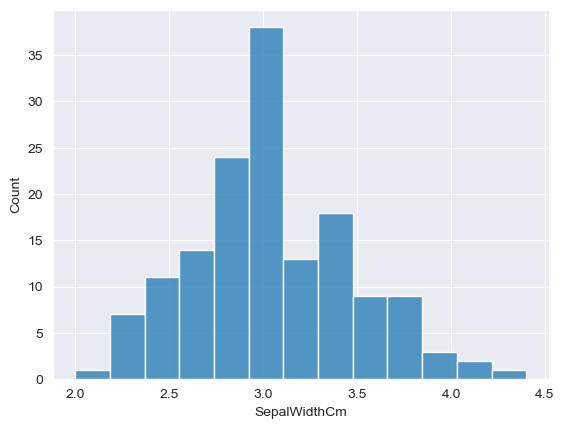

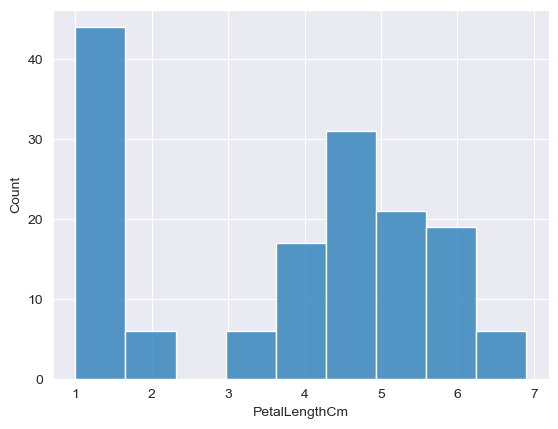

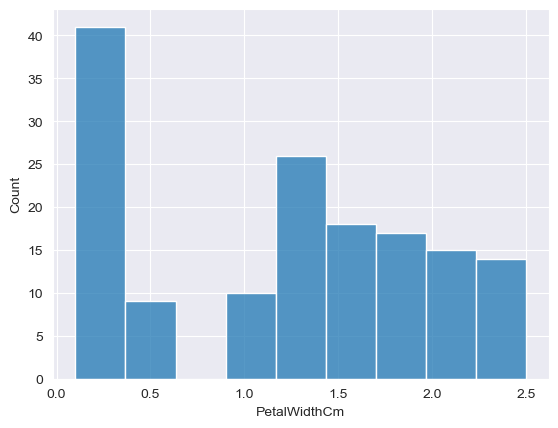

In [12]:
for col in df.columns[ :-1]:
    sns.histplot(x=col, data=df)
    plt.show()

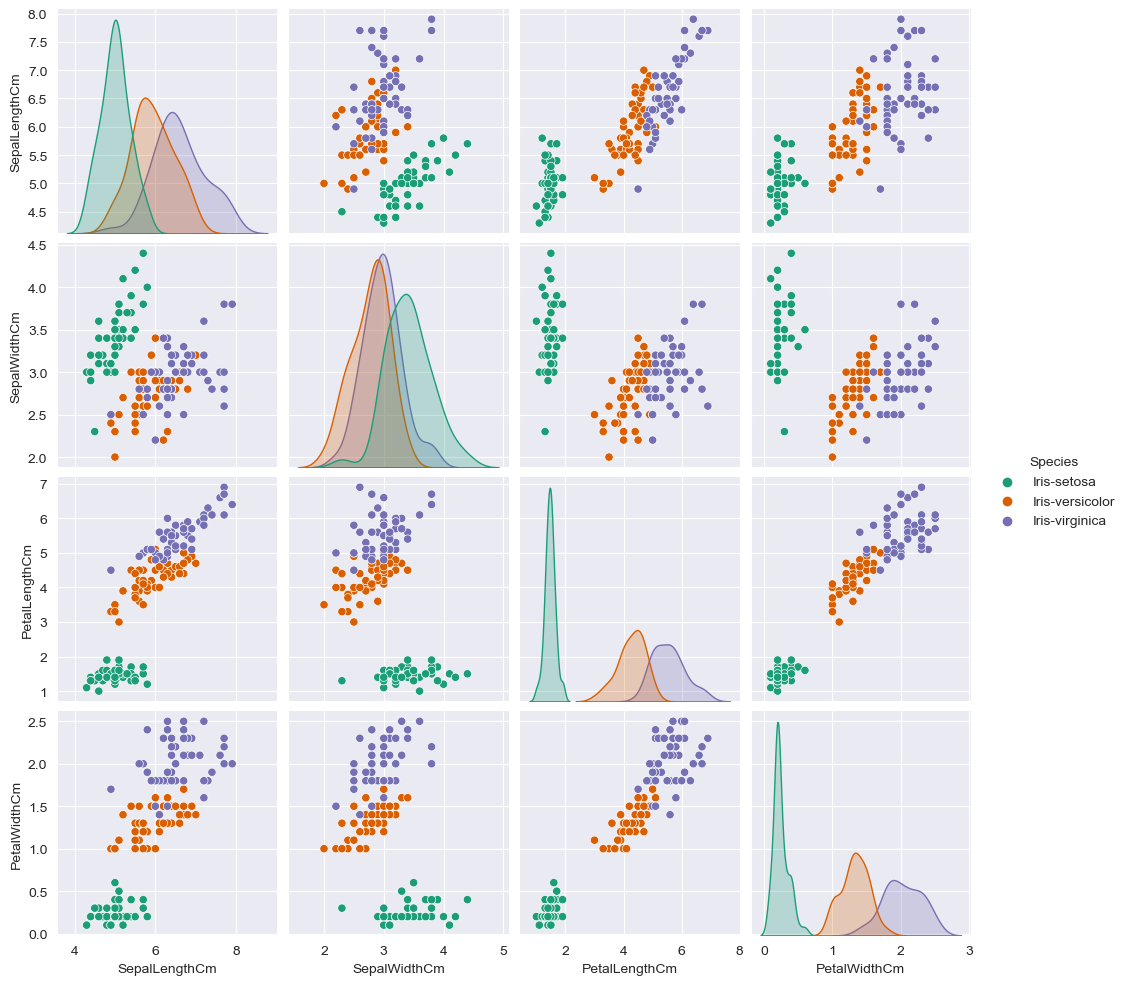

In [13]:
# Setosa is the most separable. 
sns.pairplot(df,hue='Species',palette='Dark2')

## Corelation

In [14]:
df['Species'] = df['Species'].map({ 'Iris-setosa':0 , 'Iris-versicolor':1 , 'Iris-virginica':2 })

In [15]:
df.corr()['Species'].sort_values(ascending = False)

Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
Name: Species, dtype: float64

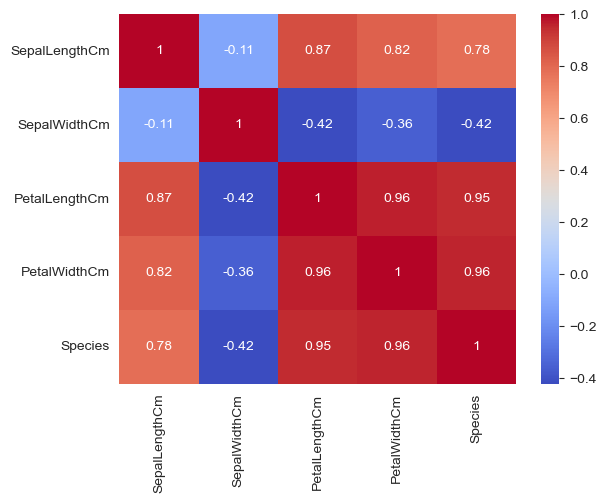

In [16]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

# Train Test Split


In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Species',axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

In [21]:
from sklearn.svm import SVC

In [22]:
svc_model = SVC()

In [23]:
svc_model.fit(X_train,y_train)

SVC()

## Model Evaluation

In [24]:
predictions = svc_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small.

## Gridsearch 

In [28]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [29]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [30]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [31]:
grid_predictions = grid.predict(X_test)

In [33]:
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [34]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Great Job!